In [25]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [28]:
# igraph
!pip install python-igraph
from igraph import *

# package to show plot of igraph
!pip install cairocffi
import cairocffi

In [106]:
import pandas as pd
import numpy as np


In [197]:
# read in adjacency matrix
ad_portfolio_mkt = pd.read_csv('/content/gdrive/My Drive/capstone/distance matrix/distance_matrix_df_by_pct_mktcap.csv',index_col=0)
ad_concentration = pd.read_csv('/content/gdrive/My Drive/capstone/distance matrix/concentration_distance.csv', index_col=0)
ad_turnover = pd.read_csv('/content/gdrive/My Drive/capstone/distance matrix/turnover_distance.csv', index_col=0)
ad_invStyle = pd.read_csv('/content/gdrive/My Drive/capstone/distance matrix/invStyle_distance.csv', index_col=0)

feature_dic = {'portfolio_mkt': ad_portfolio_mkt,
               'concentration': ad_concentration,
               'turnover': ad_turnover,
               'invStyle': ad_invStyle}

# normalize
for feature in feature_dic:
  feature_ad_mat = feature_dic[feature]
  feature_dic[feature] = feature_ad_mat/feature_ad_mat.max().max()

# the investors list should be the index of portofilio matrix
# create an empty adjacency matrix
ls_investors = set(feature_dic['portfolio_mkt'].index)
adjacency = pd.DataFrame(data = 0, index=ad_portfolio_mkt.index, columns=ad_portfolio_mkt.columns)

In [198]:
# if adjacency matrix have missing investors, fill in
def fill_missing(df, ls_investors):
  missing_investors = ls_investors - set(df.index)
  for index in missing_investors:
    df.loc[:,str(index)] = 0
    df.loc[index] = 0
  df.fillna(0,inplace=True)
  df.sort_index(inplace=True)
  return df

for feature in feature_dic:
  feature_ad_mat = feature_dic[feature]
  feature_dic[feature] = fill_missing(feature_ad_mat,ls_investors)

# add all features
for feature in feature_dic:
  feature_ad_mat = feature_dic[feature]
  adjacency = adjacency + feature_ad_mat

# change column order to make column order coordinate with index order
adjacency = adjacency[[str(i) for i in list(adjacency.index)]]

# select those in active list

In [199]:
adjacency

,2000264,2001934,2001935,2001989,2001999,2002019,2002142,2002158,2002179,2002180,2002195,2002205,2002222,2002292,2002295,2002303,2002362,2002389,2002446,2002451,2002468,2002496,2002511,2002548,2002582,2002628,2002658,2002659,2002678,2002695,2002713,2002801,2002819,2002823,2002848,2002867,2002875,2002921,2002946,2002947,...,2620417,2625886,2639138,2646754,2785553,2906273,2926442,2930530,2931843,3015075,3318171,3365036,3676543,3706224,3965008,4040011,4059340,4889409,4924814,4950170,4962258,5050280,5200477,5205742,5206490,5206923,5275446,5308615,5480445,5520904,5529187,5986931,6139212,6248967,6921752,7016524,7185253,9113038,10075382,10110259
2000264,0.000000,1.051829,1.557436,1.092098,1.103636,1.673055,0.714081,1.118878,1.160182,0.964423,1.073198,1.063587,1.236829,1.148729,1.439225,1.215515,1.092552,1.900534,1.038880,1.058896,1.326498,1.094740,0.977819,1.153073,1.200593,1.238413,1.266014,0.916607,0.992630,1.145249,1.159408,1.124994,0.742345,0.942177,1.063409,1.101971,0.984927,1.004526,1.121974,0.764344,...,1.615637,1.541746,1.920883,1.322524,1.056438,1.463328,1.098181,2.252228,1.880132,1.661652,2.021668,1.615887,1.345075,1.929049,1.628773,1.280853,1.227176,1.502358,1.554173,1.170477,1.931934,0.992209,1.313850,1.414458,1.560172,0.970438,2.083190,2.377104,1.230592,2.196976,1.129046,1.678921,1.512138,0.975382,1.104585,1.877298,1.076753,1.147069,1.773151,1.251390
2001934,1.051829,0.000000,0.640472,0.866889,0.219918,1.189119,0.881908,0.321738,1.264600,0.755663,0.253601,0.509140,1.154199,1.121854,1.089526,1.160015,0.566450,1.597894,0.565168,0.202225,0.502795,0.634895,0.365119,0.375911,0.633462,0.578557,0.750010,0.516428,0.291993,0.469179,0.407806,0.390033,0.644369,0.681051,0.265573,0.371132,0.245079,0.298283,0.253961,0.662730,...,0.877752,0.777467,1.616076,1.578480,0.676676,1.779925,1.232469,1.613477,1.045459,1.374888,1.572509,0.964394,1.673951,2.034750,1.936747,1.594271,0.618002,1.234049,1.609847,1.099119,2.154396,1.446991,1.672903,1.447591,1.566025,1.108235,1.872597,2.269706,0.933036,1.951381,1.005877,1.624563,1.824272,0.671656,1.240232,1.970511,0.644112,1.182369,2.170905,1.615344
2001935,1.557436,0.640472,0.000000,1.366482,0.505136,0.729588,1.009234,0.749830,1.618814,1.256482,0.624469,0.953933,1.408197,0.866280,1.326149,1.002062,0.942145,1.242377,0.940774,0.685575,0.444288,0.735796,0.913596,0.643082,1.204794,0.466189,0.912602,0.887179,0.682706,0.517552,0.571866,0.543189,1.010748,0.784059,0.712237,0.873824,0.642952,0.725014,0.687549,1.227257,...,1.296249,1.006636,1.427019,1.694960,0.710767,2.047130,1.550074,1.204466,1.188577,1.074248,1.329347,1.331170,1.274829,1.625159,1.588436,1.133764,1.090172,1.702575,1.427284,1.299546,1.724365,1.179114,2.149170,1.278120,1.167447,1.080483,1.513208,1.897365,0.690545,1.557284,1.147132,1.787082,1.427749,1.231175,1.786237,1.903645,1.182240,1.632805,1.764569,2.014523
2001989,1.092098,0.866889,1.366482,0.000000,0.954292,1.636534,0.985276,0.885838,1.001299,0.523015,0.870941,0.828429,1.021305,1.251295,1.477136,1.343473,0.877044,1.783998,1.108502,0.788320,1.106468,1.056372,0.844982,1.028469,0.523482,1.247336,0.633603,0.841508,0.937369,0.939201,1.101078,1.114229,0.657788,0.956490,0.735006,0.722321,0.857545,0.871514,0.849053,0.452792,...,0.928846,1.065748,1.802112,1.518365,1.081618,1.471765,0.897508,1.632997,1.323086,1.291131,1.784797,1.242892,1.704120,2.318139,1.817764,1.663197,0.858986,1.033753,1.407256,1.083383,1.922841,1.573353,1.309149,1.258714,1.716570,1.177781,1.806667,2.440116,1.445087,2.223981,1.356498,1.546592,1.960467,0.388841,0.842297,1.907732,0.768058,1.326522,2.211672,1.490421
2001999,1.103636,0.219918,0.505136,0.954292,0.000000,1.076266,0.746917,0.337347,1.327348,0.855344,0.249146,0.521868,1.185459,1.085842,1.112916,1.117261,0.491054,1.618213,0.544651,0.246020,0.421941,0.648221,0.501535,0.283440,0.791094,0.440941,0.706545,0.423938,0.227230,0.399743,0.277724,0.327031,0.554354,0.541656,0.274790,0.405776,0.204066,0.269547,0.262136,0.805152,...,0.946434,0.775980,1.621476,1.481508,0.652163,1.841782

In [218]:
def drop_edges(adjacency, pct=0.5, thres = None):
  '''
  Remove some proportion of edges if the weight is low. If threshold is provided, use the threshold
  '''
  if thres is None:
    # only compute the threshold if threshold is not provided
    thres = np.percentile(adjacency.to_numpy(), pct*100)
  print('threshold is', thres)
  # remove bottom pct of edges
  adjacency_filtered = adjacency[adjacency > thres].fillna(0)
  # print(adjacency_filtered)
  # create undirected, weighted graph
  g = Graph.Weighted_Adjacency(adjacency_filtered.values.tolist(),mode=ADJ_UNDIRECTED)
  return g

threshold is 2


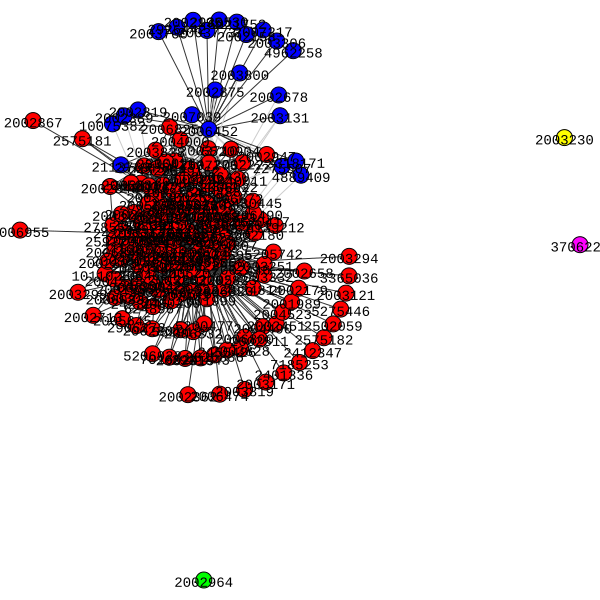

In [227]:
g = drop_edges(adjacency,thres=2)
plot(g.community_walktrap(weights=g.es["weight"]).as_clustering(),
     vertex_label = ls_investors,
     vertex_size = 16)


In [49]:
# # construct a layout
# layout = g.layout_fruchterman_reingold(weights=g.es["weight"])

# # construct the plot settings
# plot_settings = dict(
#         layout=layout,
#         edge_width=rescale(g.es["weight"], out_range=(0.0, 5.0))
# )

# # plot the graph
# plot(g.community_walktrap(weights=g.es["weight"]).as_clustering(),**plot_settings)
# # plot(g, **plot_settings)